In [235]:
import pandas as pd
import datetime
import numpy as np
import requests
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
special_omms = pd.read_csv('/Users/ramoniglesias/development/hamo/globalinfo/Special_omms_id.csv')
special_omms_id = special_omms['omms_id'].tolist()
special_omms =special_omms.set_index('omms_id')
stations_state = pd.read_csv(
    '/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/scenarios/s1/stations_state.csv'
).set_index('station_id')
mean_estimator = np.load('/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/mean_demand_weekday_5min.npy')
id_to_idx = np.load('/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/station_mapping.npy').item()

In [125]:
def map_id_to_usertype(series):
    uid = series['omms_id']
    if uid in special_omms.index:
        usertype = special_omms.loc[uid]['property']
    elif series['status'] > 90:
        usertype = 'Maintaner'
    else:
        usertype = 'Customer'
    return usertype

In [106]:
url = "https://sp-ride.tp-tsc.com/omsp/external/carShare/historyList"
apikey = os.getenv('HAMO_APIKEY')

def urlify_date(dt):
    return str(dt).replace('-','/')

def get_car_share_history(start_dt, end_dt):
    querystring = {
        "zone_id":"1",
        "search_dt_from":urlify_date(start_dt),
        "search_dt_to":urlify_date(end_dt)
    }
    headers = {
        'omms_auth': apikey,
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    return response.json()

In [130]:
start_dt = datetime.datetime(2018,3,29,0,0)
end_dt = datetime.datetime(2018,3,29,23,55)

In [131]:
share_history = get_car_share_history(start_dt, end_dt)

In [174]:
carShare = pd.DataFrame(share_history['carShare'])
carShare['start_dt'] = pd.to_datetime(carShare['start_dt'])
carShare['end_dt'] = pd.to_datetime(carShare['end_dt'])
carShare['usertype'] = carShare.apply(map_id_to_usertype, axis = 1)

In [175]:
carShare[carShare['usertype'] == 'Maintaner']

,cancel_dt,car_id,end_dt,forced_cancel_dt,forced_end_dt,id,omms_id,registered_dt,reserved_type,sharing_uid,start_dt,station_id_dst,station_id_org,status,usertype
0,None,133,2018-03-29 16:06:08,None,None,326157,None,2018-01-30 09:21:37,2,100293459,2018-01-31 09:51:40,9,37,93,Maintaner
159,None,6013,2018-03-29 15:43:07,None,None,326146,None,2018-03-29 13:45:09,2,100316639,2018-03-29 14:14:32,17,2013,93,Maintaner
186,None,61,2018-03-29 16:10:58,None,None,326158,None,2018-03-29 16:09:00,2,100316699,2018-03-29 16:09:31,22,22,93,Maintaner
273,None,61,2018-03-29 20:01:26,None,None,326324,None,2018-03-29 18:53:23,2,100316800,2018-03-29 19:53:28,37,22,93,Maintaner
275,None,79,2018-03-29 20:45:50,None,None,326359,None,2018-03-29 18:58:18,2,100316802,2018-03-29 20:41:02,9,7,93,Maintaner
345,None,115,2018-03-29 21:47:36,None,None,326387,None,2018-03-29 21:13:22,2,100316887,2018-03-29 21:13:50,37,37,93,Maintaner


In [176]:
carShare[~carShare['start_dt'].isnull()].sort_values('start_dt')

,cancel_dt,car_id,end_dt,forced_cancel_dt,forced_end_dt,id,omms_id,registered_dt,reserved_type,sharing_uid,start_dt,station_id_dst,station_id_org,status,usertype
0,None,133,2018-03-29 16:06:08,None,None,326157,None,2018-01-30 09:21:37,2,100293459,2018-01-31 09:51:40,9,37,93,Maintaner
1,None,6013,2018-03-29 06:55:16,None,None,325921,TP#0LK58,2018-03-28 17:38:51,1,100316231,2018-03-28 18:12:32,7,44,13,Corporation
2,None,5021,2018-03-29 00:00:22,None,None,325892,TP#08Z55,2018-03-28 20:13:03,1,100316343,2018-03-28 20:13:42,9118,7,13,Customer
3,None,64,2018-03-29 07:56:15,None,None,325952,TP#0Q4C4,2018-03-28 21:04:46,1,100316378,2018-03-28 21:07:13,55,55,13,Customer
4,None,78,2018-03-29 09:01:52,None,None,325990,TP#05X29,2018-03-28 21:07:58,1,100316381,2018-03-28 21:25:52,2008,37,13,Customer
5,None,131,2018-03-29 07:03:46,None,None,325925,TP#0LK66,2018-03-28 21:42:42,1,100316391,2018-03-28 21:45:04,7,17,13,Corporation
6,None,37,2018-03-29 08:04:13,None,None,325956,TP#0BZ64,2018-03-28 22:46:40,1,100316416,2018-03-28 23:00:48,40,40,13,Customer
7,None,51,2018-03-29 06:54:05,None,None,325919,TP#04GN8,2018-03-28 23:30:14,1,100316425,2018-03-28 23:31:19,7,7,13,Customer
9,None,82,2018-03-29 00:57:35,None,None,325898,TP#02XV2,2018-03-29 00:33:30,1,100316430,2018-03-29 00:43:40,7,37,13,Customer
10,None,20,2018-03-29 17:29:58,None,None,326200,TP#0QNZ0,2018-03-29 04:45:06,1,100316439,2018-03-29 05:42:19,3,3,13,Customer


In [445]:
period_start = datetime.datetime(2018,3,29,7,15)
period_end = datetime.datetime(2018,3,29,8,15)
period_start2 = datetime.datetime(2018,3,29,7,0)
period_end2 = datetime.datetime(2018,3,29,8,0)
morning_reb = carShare[(carShare['usertype'] == 'Rebalancer') & \
         (carShare['start_dt'] > period_start) &\
         (carShare['start_dt'] < period_end) \
        ].sort_values('start_dt')

In [446]:
morning_reb.to_csv(
    '/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/scenarios/s1/hist_reb.csv'
)

In [447]:
carShare['time_bucket'] = carShare['start_dt'].dt.round('5min')

In [448]:
customer_mask = carShare['usertype'] == 'Customer'
grouped = carShare[customer_mask][['id','time_bucket']].groupby('time_bucket').count()

In [449]:
period_mask = (grouped.index > period_start2) & (grouped.index < period_end2)

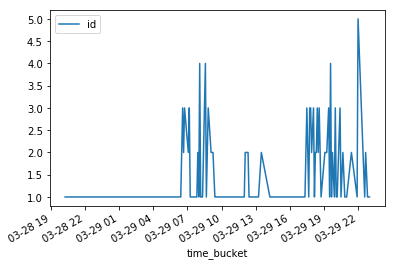

In [450]:
grouped.plot()

In [451]:
stations_state.head()

,idle_vehicles,available_parking,is_open,opening_flag_today,service_type,station_lat,station_lng,station_name,status,parking_spots
station_id,,,,,,,,,,
2549,3.0,0.0,1.0,1,1,35.122879,137.138421,CHEF'S GARDEN OHANA豊田浄水店,0,3.0
57,0.0,1.0,1.0,1,1,35.121988,137.147907,ファミリーマート豊田浄水町原山店,0,1.0
30,0.0,133.0,1.0,1,1,35.061381,137.161000,メンテナンスステーション,0,133.0
1,0.0,0.0,1.0,1,1,35.140623,137.147945,中京大学北,0,0.0
2,0.0,0.0,1.0,1,1,35.137620,137.147390,中京大学南,0,0.0


In [452]:
departures = pd.pivot_table(
    carShare[customer_mask][['id','time_bucket','station_id_org']],
    index = 'time_bucket',
    columns = ['station_id_org'],
    aggfunc = len,
    values = 'id',
    fill_value = 0
)

arrivals = pd.pivot_table(
    carShare[customer_mask][['id','time_bucket','station_id_dst']],
    index = 'time_bucket',
    columns = ['station_id_dst'],
    aggfunc = len,
    values = 'id',
    fill_value = 0
)

av_vehicles = stations_state['idle_vehicles']

av_parking = stations_state['available_parking']

In [453]:
vehicle_availability = (av_vehicles - departures[period_mask].sum()).fillna(0)
parking_availability = (av_parking - arrivals[period_mask].sum()).fillna(0)

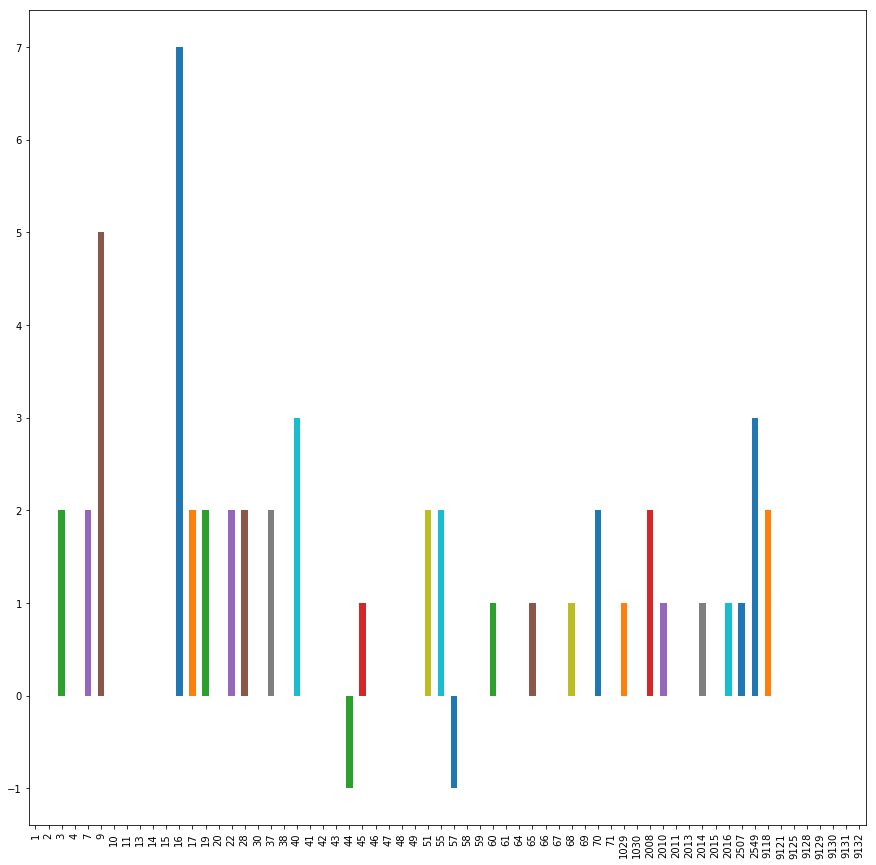

In [454]:
plt.figure(figsize = (15,15))
vehicle_availability.plot(kind='bar')

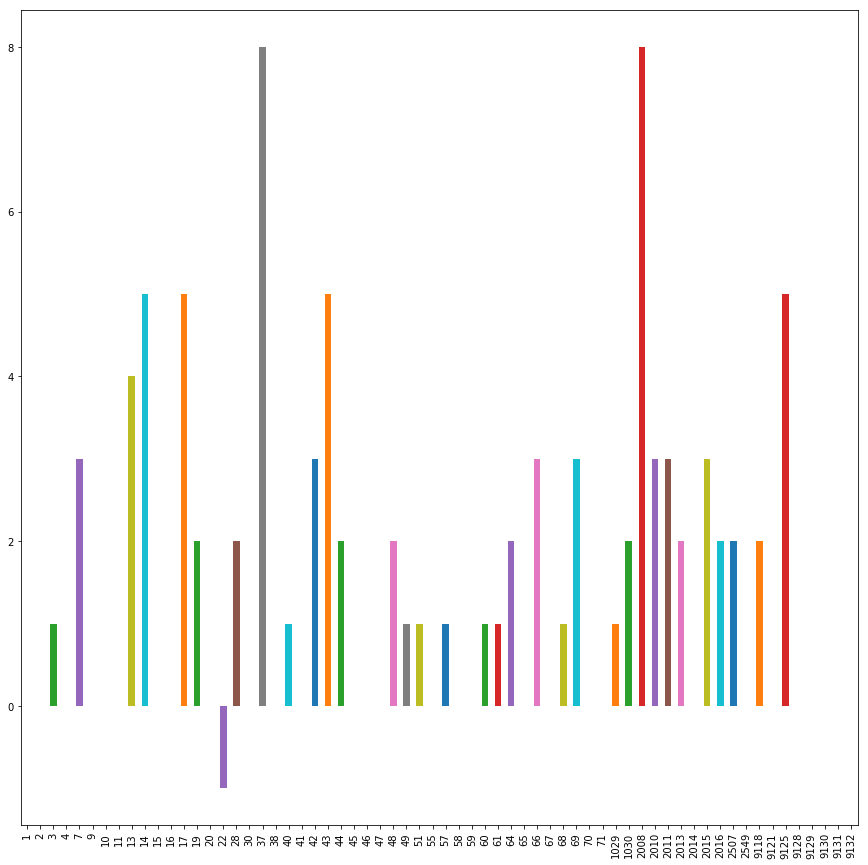

In [455]:
plt.figure(figsize = (15,15))
parking_availability.plot(kind='bar')

In [424]:
tinit = 7 * 12
tend = tinit + 2 * 12
est_departures = mean_estimator[tinit:tend, :, :].sum(axis=0).sum(axis=1)
est_arrivals = mean_estimator[tinit:tend, :, :].sum(axis=0).sum(axis=0)
cols = [0]*len(est_departures)
col_idx = []
for k,v in id_to_idx.iteritems():
    cols[v] = int(k)
est_departures = pd.Series(est_departures, index = cols)
est_arrivals = pd.Series(est_arrivals, index = cols)

In [425]:
est_vehicle_availability = (av_vehicles - est_departures).fillna(0)
est_parking_availability = (av_parking - est_arrivals).fillna(0)

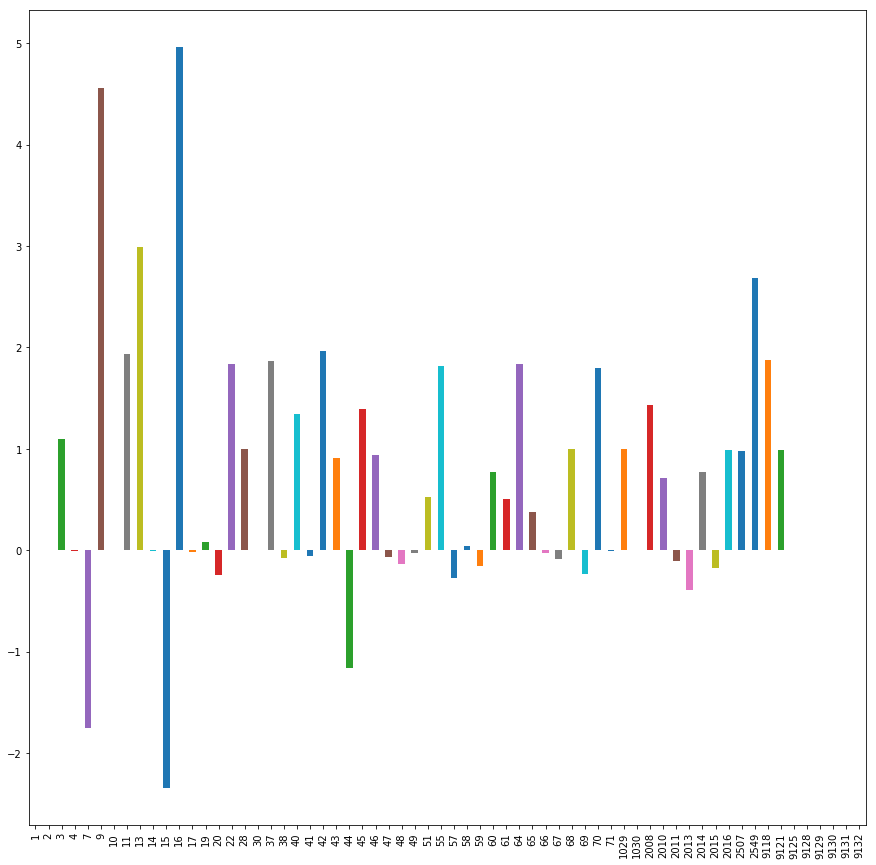

In [426]:
plt.figure(figsize = (15,15))
est_vehicle_availability.plot(kind='bar')

/Users/ramoniglesias/development/hamo-controller/backend/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


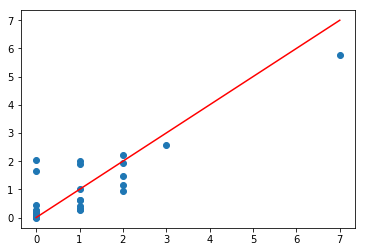

In [423]:
idx = departures[period_mask].sum().index
plt.scatter( departures[period_mask].sum().loc[idx], est_departures.loc[idx])
plt.plot([0,7],[0,7], color = 'red')

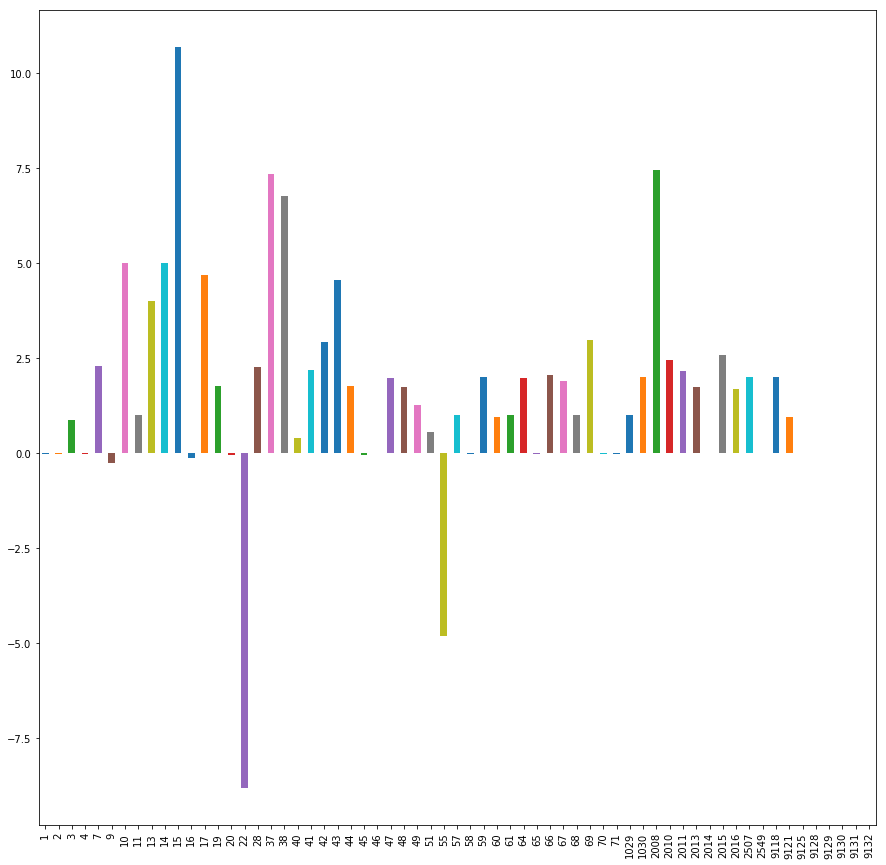

In [431]:
plt.figure(figsize = (15,15))
maint_mask = est_parking_availability < 20
est_parking_availability[maint_mask].plot(kind='bar')

/Users/ramoniglesias/development/hamo-controller/backend/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


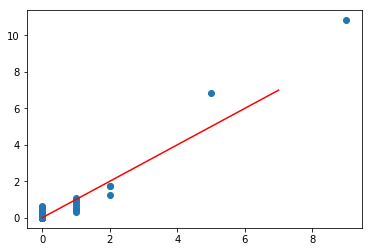

In [433]:
idx = arrivals[period_mask].sum().index
plt.scatter( arrivals[period_mask].sum().loc[idx], est_arrivals[maint_mask].loc[idx])
plt.plot([0,7],[0,7], color = 'red')

## Save historical demand as "estimate"

In [436]:
start_dt = datetime.datetime(2018,3,29,0,0)
end_dt = datetime.datetime(2018,3,29,23,55)
time_mask = (carShare['time_bucket'] > start_dt) & (carShare['time_bucket'] <= end_dt)
day_demand = pd.pivot_table(
    carShare[customer_mask & time_mask][['id','time_bucket','station_id_org','station_id_dst']],
    index = 'time_bucket',
    columns = ['station_id_org','station_id_dst'],
    aggfunc = len,
    values = 'id',
    fill_value = 0
)

In [437]:
period_mask = (day_demand.index > period_start2) & (day_demand.index < period_end2)
day_demand[period_mask].loc[:,7].values.sum()

7

In [464]:
# naive version
N = len(stations_state.index)
dt = datetime.timedelta(0,60*5)
real_demand = np.zeros((288, N, N))
dates = [start_dt + t*dt for t in range(288)]
for tidx, t in enumerate(dates):
    if t in day_demand.index:
        demand_at_date = day_demand.loc[t]
        for k,val in demand_at_date.to_dict().iteritems():
            (src,dst) = map(
                lambda x: stations_state.index.tolist().index(x),
                k
            )
            real_demand[tidx, src, dst] = val
real_id_to_idx = {str(s_id):idx for idx,s_id in enumerate(stations_state.index)}

In [465]:
tinit = 7 * 12
tend = tinit + 2 * 12
est_departures = real_demand[tinit:tend, :, :].sum(axis=0).sum(axis=1)
est_arrivals = real_demand[tinit:tend, :, :].sum(axis=0).sum(axis=0)
cols = [0]*len(est_departures)
col_idx = []
for s_id,idx in real_id_to_idx.iteritems():
    cols[idx] = int(s_id)
    col_idx.append(idx)
est_departures = pd.Series(est_departures, index = cols)
est_arrivals = pd.Series(est_arrivals, index = cols)

In [466]:
est_vehicle_availability = (av_vehicles - est_departures).fillna(0)
est_parking_availability = (av_parking - est_arrivals).fillna(0)

In [467]:
np.save('/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/real_demand_3_29_5min.npy', real_demand)
np.save('/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/id_to_idx_3_29.npy',real_id_to_idx)

In [468]:
np.load('/Users/ramoniglesias/development/hamo-controller/backend/adhoc_scripts/id_to_idx_3_29.npy')

array({'9121': 52, '9125': 27, '9132': 11, '9128': 46, '9129': 8, '51': 40, '60': 42, '61': 31, '64': 62, '65': 54, '66': 24, '67': 53, '68': 61, '69': 44, '20': 28, '22': 23, '49': 22, '46': 34, '47': 33, '2549': 0, '45': 63, '42': 29, '43': 20, '40': 9, '41': 25, '1': 3, '3': 5, '2': 4, '4': 6, '7': 17, '2015': 19, '2014': 7, '1030': 43, '2016': 48, '2011': 47, '2010': 32, '2013': 56, '28': 30, '9118': 38, '9131': 12, '9130': 16, '9': 14, '2507': 51, '71': 60, '70': 59, '15': 15, '14': 45, '11': 36, '10': 39, '13': 41, '38': 26, '59': 49, '58': 50, '17': 13, '16': 18, '55': 21, '57': 1, '30': 2, '1029': 55, '19': 58, '37': 57, '48': 37, '2008': 35, '44': 10},
      dtype=object)

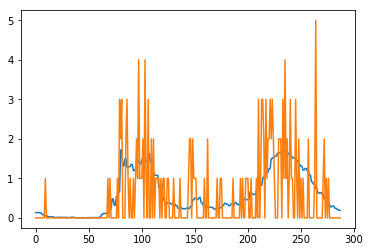

In [469]:
plt.plot(mean_estimator.sum(axis=1).sum(axis=1))
plt.plot(real_demand.sum(axis=1).sum(axis=1))

In [459]:
7 * 12

84

In [470]:
est_arrivals

2549    0.0
57      0.0
30      0.0
1       0.0
2       0.0
3       0.0
4       0.0
2014    0.0
9129    0.0
40      0.0
44      0.0
9132    0.0
9131    0.0
17      1.0
9       0.0
15      0.0
9130    0.0
7       1.0
16      0.0
2015    1.0
43      1.0
55      5.0
49      2.0
22      9.0
66      1.0
41      0.0
38      0.0
9125    1.0
20      1.0
42      0.0
       ... 
46      0.0
2008    1.0
11      0.0
48      0.0
9118    0.0
10      0.0
51      0.0
13      0.0
60      0.0
1030    0.0
69      0.0
14      0.0
9128    0.0
2011    1.0
2016    0.0
59      0.0
58      0.0
2507    0.0
9121    0.0
67      0.0
65      0.0
1029    0.0
2013    2.0
37      0.0
19      0.0
70      0.0
71      0.0
68      0.0
64      0.0
45      0.0
Length: 64, dtype: float64